In [10]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
epochs = pickle.load(open('./HPC/epochs_nohidden.pkl','rb'))
trainacc = pickle.load(open('./HPC/trainacc_nohidden.pkl','rb'))
testacc = pickle.load(open('./HPC/testacc_nohidden.pkl','rb'))

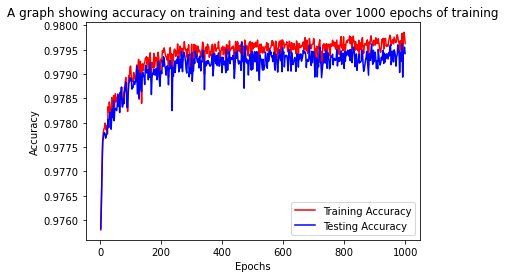

In [7]:
plt.plot(epochs, trainacc, color = 'r',label="Training Accuracy")
plt.plot(epochs, testacc, color='b',label="Testing Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('A graph showing accuracy on training and test data over 1000 epochs of training')
plt.legend()
plt.show()

In [12]:
nohiddenmodel = tf.keras.models.load_model('NoHiddenModelHPC')

TypeError: Error converting shape to a TensorShape: Dimension value must be integer or None or have an __index__ method, got 'class_name'.